In [12]:
import os, sys, inspect

cmd_folder = os.path.realpath(os.path.abspath(os.path.split(inspect.getfile( inspect.currentframe() ))[0]))
if cmd_folder not in sys.path:
    sys.path.insert(0, cmd_folder)


cmd_subfolder = os.path.realpath(os.path.abspath(os.path.join(os.path.split(inspect.getfile( inspect.currentframe() ))[0],"lib/Leap")))
if cmd_subfolder not in sys.path:
    sys.path.insert(0, cmd_subfolder)
    cmd_subfolder = os.path.realpath(os.path.abspath(os.path.join(os.path.split(inspect.getfile( inspect.currentframe() ))[0],"lib/Anderson")))
if cmd_subfolder not in sys.path:
    sys.path.insert(0, cmd_subfolder)

In [13]:
import pandas as pd
import numpy as np
import neuralnetworks as nn
import mlutils as ml

In [14]:
def trainNNs(X, T, trainFraction, hiddenLayerStructures, numberRepetitions, numberIterations, classify=False):
    import neuralnetworks as nn
    import mlutils as ml
    import numpy as np
    import time
    result = []
    for structure in hiddenLayerStructures:
        trainedResult = []
        testResult = []
        t0 = time.time()
        for n in range(0, numberRepetitions):
            Xtrain,Ttrain,Xtest,Ttest = ml.partition(X,T,(trainFraction, 1-trainFraction),classify)
            if classify:
                nnet = nn.NeuralNetworkClassifier(X.shape[1], structure, len(np.unique(T)))
                nnet.train(Xtrain, Ttrain, numberIterations, errorPrecision=1.e-8)
                trainedResult.append(np.sum(nnet.use(Xtrain)==Ttrain)/len(Ttrain))
                testResult.append(np.sum(nnet.use(Xtest)==Ttest)/len(Ttest))
            else:
                nnet = nn.NeuralNetwork(X.shape[1], structure, T.shape[1])
                nnet.train(Xtrain, Ttrain, numberIterations)
                trainedResult.append(np.sqrt(np.mean(((nnet.use(Xtrain)-Ttrain)**2))))
                testResult.append(np.sqrt(np.mean(((nnet.use(Xtest)-Ttest)**2))))

            
        result.append([structure, trainedResult, testResult, time.time() - t0])
    return result

def summarize(results):
    import numpy as np
    summaryResults = []
    for result in results:
        summaryResults.append([result[0], np.mean(result[1]), np.mean(result[2]), result[3]])
    return summaryResults


def bestNetwork(summary):
    best = min(summary, key=lambda l: l[2])
    return best


Dependencies/import config

## Get Data

In [15]:
data = pd.read_csv("templates/data1.csv")
names = list(data)
data["signcode"] = data["sign"].astype('category').cat.codes
data = data.values

In [16]:
Xhands = data[:, 0:63]
Xhands = Xhands.astype(np.float64)

In [17]:
Tsign = data[:, 64:65]
Tsign = Tsign.astype(np.int32)

In [18]:
Xhands.shape

(822, 63)

In [19]:
Tsign.shape

(822, 1)

In [20]:
handNames = names[0:63]
signName = names[63]

In [21]:
for i in range(0, len(np.unique(Tsign).tolist())):
    print('{} samples in class {}'.format(np.sum(Tsign==i), i))

46 samples in class 0
55 samples in class 1
25 samples in class 2
27 samples in class 3
27 samples in class 4
36 samples in class 5
31 samples in class 6
37 samples in class 7
37 samples in class 8
43 samples in class 9
34 samples in class 10
30 samples in class 11
31 samples in class 12
31 samples in class 13
26 samples in class 14
21 samples in class 15
27 samples in class 16
33 samples in class 17
24 samples in class 18
33 samples in class 19
27 samples in class 20
25 samples in class 21
26 samples in class 22
32 samples in class 23
27 samples in class 24
31 samples in class 25


Get list of how many samples in each class/category/how many of each sign.

## Test NNet

In [22]:
results = trainNNs(Xhands, Tsign, 0.90, [[50], [20, 20], [5,2,2,5], [5,5,5], [5,5], 5], 10, 100, classify=True)

In [23]:
results

[[[50],
  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
  [0.76829268292682928,
   0.81707317073170727,
   0.82926829268292679,
   0.75609756097560976,
   0.84146341463414631,
   0.71951219512195119,
   0.81707317073170727,
   0.82926829268292679,
   0.78048780487804881,
   0.79268292682926833],
  16.84015941619873],
 [[20, 20],
  [0.96747967479674801,
   0.98102981029810299,
   0.99593495934959353,
   0.99322493224932251,
   0.98102981029810299,
   0.97967479674796742,
   0.98915989159891604,
   0.97831978319783197,
   0.99051490514905149,
   0.98780487804878048],
  [0.73170731707317072,
   0.76829268292682928,
   0.76829268292682928,
   0.79268292682926833,
   0.76829268292682928,
   0.81707317073170727,
   0.68292682926829273,
   0.76829268292682928,
   0.80487804878048785,
   0.78048780487804881],
  11.995526313781738],
 [[5, 2, 2, 5],
  [0.21951219512195122,
   0.25880758807588078,
   0.33875338753387535,
   0.17208672086720866,
   0.26964769647696479,
   0.19241192411924118

In [24]:
summarize(results)

[[[50], 1.0, 0.79512195121951224, 16.84015941619873],
 [[20, 20], 0.98441734417344173, 0.76829268292682928, 11.995526313781738],
 [[5, 2, 2, 5], 0.23509485094850949, 0.22195121951219515, 7.1509058475494385],
 [[5, 5, 5], 0.3948509485094851, 0.36097560975609755, 9.308178901672363],
 [[5, 5], 0.61084010840108405, 0.57439024390243898, 12.14653992652893],
 [5, 0.73224932249322494, 0.65975609756097553, 6.155302047729492]]

In [25]:
bestNet = bestNetwork(summarize(results))
bestNet

[[5, 2, 2, 5], 0.23509485094850949, 0.22195121951219515, 7.1509058475494385]

## Plot the test

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

#run best on 
Xtrain,Ttrain,Xtest,Ttest = ml.partition(Xhands,Tsign,(0.8, 0.2),True)
nnet = nn.NeuralNetworkClassifier(Xtrain.shape[1], bestNet[0], len(np.unique(Ttrain)))
nnet.train(Xtrain, Ttrain, 100)

NeuralNetwork(63, [5, 2, 2, 5], 26)
   Network was trained for 100 iterations. Final error is 0.07662725955512321.

In [27]:
result = nnet.use(Xtest)

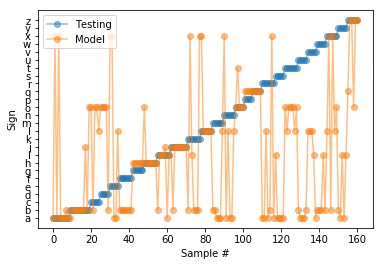

In [28]:
#plt.subplot(3, 1, 1)
plt.plot(Ttest, 'o-', alpha=0.5)
plt.plot(result, "o-", alpha=0.5)

labels = np.unique(data[:, 63])
plt.xlabel("Sample #")
plt.ylabel("Sign")

plt.yticks(np.unique(Ttest).tolist(), np.unique(labels).tolist())

plt.legend(('Testing','Model'), loc='upper left')

vs